# [オンライン開催]自然言語処理ライブラリTransformersを学ぶ第2回

In [1]:
!ls

install.py  sample_data  utils.py


In [3]:
from install import *

In [4]:
install_requirements(is_chapter2=True)

⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


In [5]:
# hide
from utils import *
setup_chapter()

No GPU was detected! This notebook can be *very* slow without a GPU 🐢
Go to Runtime > Change runtime type and select a GPU hardware accelerator.
Using transformers v4.16.2
Using datasets v1.16.1


## Section1. テキスト分類

### Section1-1. テキスト分類 概要
テキストの分類は、NLP で最も一般的なタスクの 1 つです。顧客のフィードバックをカテゴリにタグ付けしたり、顧客の言語に応じてサポート チケットをルーティングしたりするなど、幅広い用途に使用できます。おそらく、電子メール プログラムのスパム フィルターがテキスト分類を使用して、大量の迷惑メールから受信箱を保護している可能性があります。

もう 1 つの一般的なタイプのテキスト分類はセンチメント分析です。これは (<<chapter_introduction>> で見たように) 特定のテキストの極性を特定することを目的としています。たとえば、テスラのような企業は、<> 内のような Twitter の投稿を分析して、人々が自社の新しい車の屋根を気に入っているかどうかを判断するかもしれません。



![任意の画像名を付ける](https://drive.google.com/uc?id=1iwMW23k9uEkLjXf_Una3gTIGErw1OV7H)

ここで、あなたがデータ サイエンティストで、人々が自社の製品について Twitter 上で表現する「怒り」や「喜び」などの感情状態を自動的に識別できるシステムを構築する必要があると想像してください。この章では、DistilBERT と呼ばれる BERT のバリアントを使用してこのタスクに取り組みます。脚注:[V. Sanh et al.、「DistilBERT, a Distilled Version of BERT: Smaller, Faster, Cute and Lighter」(2019)] このモデルの主な利点は、大幅に小型で効率的でありながら、BERT と同等のパフォーマンスを達成できることです。 。これにより、分類器を数分でトレーニングできるようになり、より大きな BERT モデルをトレーニングしたい場合は、事前トレーニングされたモデルのチェックポイントを変更するだけで済みます。チェックポイントは、特定のトランスフォーマー アーキテクチャにロードされる重みのセットに対応します。

これは、Hugging Face エコシステムの 3 つのコア ライブラリ、image:images/logo.png[hf,13,13] データセット、image:images/logo.png[hf,13,13] トークナイザーとの最初の遭遇でもあります。 、および image:images/logo.png[hf,13,13] トランスフォーマー。 <> に示すように、これらのライブラリを使用すると、生のテキストから、新しいツイートの推論に使用できる微調整されたモデルに迅速に移行できます。それでは、オプティマス プライムの精神に基づいて、「変身し、展開しましょう!」脚注: [オプティマス プライムは、子供たち (そして心の若い人たちに人気のトランスフォーマー シリーズのロボット種族のリーダーです) !)。]

![任意の画像名を付ける](https://drive.google.com/uc?id=1oDY29cp_B6XODzWnAYnH1cRL7e3KSANA)

## データセット

感情検出器を構築するには、英語の Twitter メッセージで感情がどのように表現されるかを調査した記事の優れたデータセットを使用します。脚注:[E. Saravia 他、「CARER: Contextualized Affect Representations for Emotion Recognition」、自然言語処理における経験的手法に関する 2018 年会議議事録 (2018 年 10 月～11 月): 3687 ～ 3697、http://dx.doi.org/10.18653 /v1/D18-1404.] 「ポジティブ」と「ネガティブ」の極性のみを含むほとんどの感情分析データセットとは異なり、このデータセットには、怒り、嫌悪感、恐怖、喜び、悲しみ、驚きという 6 つの基本的な感情が含まれています。ツイートが与えられた場合、私たちのタスクは、ツイートをこれらの感情のいずれかに分類できるモデルをトレーニングすることになります。

### HuggingFace データセットの概要

image:images/logo.png[hf,13,13] データセットを使用して、[Hugging Face Hub](https://huggingface.co/datasets) からデータをダウンロードします。 `list_datasets()` 関数を使用すると、ハブでどのようなデータセットが利用可能であるかを確認できます。

In [8]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 57980 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa',
'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue',
'ajgt_twitter_ar', 'allegro_reviews']



各データセットに名前が付けられていることがわかるので、`load_dataset()` 関数を使用して`emotion`データセットをロードしましょう。

In [13]:
from datasets import load_dataset
emotions = load_dataset("dair-ai/emotion")

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.28k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/592k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/74.9k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]


`emotions`オブジェクトの内部を見てみると、次のようになります。



In [14]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

これは Python 辞書に似ており、各キーが異なる分割に対応していることがわかります。そして、通常の辞書構文を使用して、個々の分割にアクセスできます。

In [15]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

これは`Dataset`クラスのインスタンスを返します。 `Dataset`オブジェクトは、image:images/logo.png[hf,13,13] データセットの中核となるデータ構造の 1 つであり、この本の過程を通じてその機能の多くを調べていきます。まず、これは通常の Python 配列またはリストのように動作するため、その長さをクエリできます。

In [16]:
len(train_ds)

16000

または、インデックスによって 1 つの例にアクセスします

In [17]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

ここでは、単一の行が辞書として表されており、キーが列名に対応していることがわかります。

In [18]:
train_ds.column_names

['text', 'label']

そしてその価値はツイートと感情です。これは、image:images/logo.png[hf,13,13] データセットが Apache Arrow に基づいているという事実を反映しています。Apache Arrow は、ネイティブ Python よりもメモリ効率の高い型付き列形式を定義します。 Dataset オブジェクトの features 属性にアクセスすることで、どのデータ型が内部で使用されているかを確認できます。

In [19]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6,
names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None,
id=None)}


この場合、`text`列のデータ型は`string`ですが、`label`列はクラス名とその整数へのマッピングに関する情報を含む特別な`ClassLabel`オブジェクトです。スライスを使用して複数の行にアクセスすることもできます。

In [20]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so
damned hopeful just from being around someone who cares and is awake', 'im
grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic
about the fireplace i will know that it is still on the property', 'i am feeling
grouchy'], 'label': [0, 0, 3, 2, 3]}


この場合、ディクショナリ値は個々の要素ではなくリストになっていることに注意してください。完全な列を名前で取得することもできます。

In [21]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned
hopeful just from being around someone who cares and is awake', 'im grabbing a
minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the
fireplace i will know that it is still on the property', 'i am feeling grouchy']


image:images/logo.png[hf,13,13] データセットを使用してデータをロードして検査する方法を確認したので、ツイートの内容について健全性をいくつかチェックしてみましょう。

### 補足: データセットがHub上にない場合はどうすればよいですか?

この本のほとんどの例では、Hugging Face Hub を使用してデータセットをダウンロードします。しかし多くの場合、ラップトップまたは組織内のリモート サーバーに保存されているデータを操作することになるでしょう。

```asciidoc
[[dataset-loading]]
.How to load datasets in various formats
[options="header"]
|======
| Data format | Loading script | Example
| CSV | `csv` | `load_dataset("csv", data_files="my_file.csv")`
| Text | `text` | `load_dataset("text", data_files="my_file.txt")`
| JSON | `json` | `load_dataset("json", data_files="my_file.jsonl")`
|======
```

各データ形式でわかるように、必要なのは、1 つ以上のファイルへのパスまたは URL を指定する `data_files` 引数とともに、関連する読み込みスクリプトを`load_dataset()` 関数に渡すことだけです。

In [22]:
# The original URL used in the book is no longer available, so we use a different one
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2023-08-26 14:14:34--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 18.161.135.104, 18.161.135.112, 18.161.135.71, ...
Connecting to huggingface.co (huggingface.co)|18.161.135.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  --.-KB/s    in 0.09s   

2023-08-26 14:14:35 (16.9 MB/s) - ‘train.txt’ saved [1658616/1658616]



前述のシェル コマンドになぜ「!」文字があるのか​​疑問に思っている場合は、コマンドを Jupyter ノートブックで実行しているためです。ターミナル内でデータセットをダウンロードして解凍する場合は、プレフィックスを削除するだけです。ここで、_train.txt_ ファイルの最初の行を覗いてみると、次のようになります。

In [23]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


ここには列ヘッダーがなく、各ツイートと感情がセミコロンで区切られていることがわかります。それにもかかわらず、これは CSV ファイルに非常に似ているため、`csv` スクリプトを使用し、`data_files` 引数を _train.txt_ ファイルに指定することで、データセットをローカルにロードできます。

In [24]:
#hide_output
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
                              names=["text", "label"])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-0fbcc89857502a4e/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


/usr/local/lib/python3.10/dist-packages/datasets/packaged_modules/csv/csv.py:170: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

ここでは、区切り文字の種類と列の名前も指定しました。さらに簡単なアプローチは、`data_files` 引数に URL 自体を指定することです。

In [25]:
#hide_output
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])

  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-77d91d09868a1841/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


/usr/local/lib/python3.10/dist-packages/datasets/packaged_modules/csv/csv.py:170: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

これにより、データセットが自動的にダウンロードされ、キャッシュされます。ご覧のとおり、`load_dataset()` 関数は非常に多用途です。完全な概要を把握するには、image:images/logo.png[hf,13,13] データセット [ドキュメント](https://huggingface.co/docs/datasets/loading.html) を確認することをお勧めします。

### データセットのDataFrame型への変換

image:images/logo.png[hf,13,13] Datasets はデータを細かく分割するための低レベルの機能を多数提供しますが、多くの場合、`Dataset` オブジェクトを Pandas の `DataFrame` に変換すると便利です。データ視覚化のための高レベル API にアクセスできます。変換を有効にするために、image:images/logo.png[hf,13,13] データセットには、「データセット」の出力形式を変更できる `set_format()`メソッドが用意されています。これによって、基礎となる _data format_ (Arrow テーブル) が変更されるわけではないことに注意してください。必要に応じて、後で別の形式に切り替えることができます。

In [26]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3



ご覧のとおり、列ヘッダーは保持されており、最初の数行はデータの以前のビューと一致しています。ただし、ラベルは整数として表されるため、`label`機能の`int2str()`メソッドを使用して、対応するラベル名を持つ新しい列を`DataFrame`に作成しましょう。

In [27]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger



分類器の構築に入る前に、データセットを詳しく見てみましょう。 Andrej Karpathy の有名なブログ投稿 ["A Recipe for Training Neural Networks"](https://karpathy.github.io/2019/04/25/recipe) で述べているように、「データと一体になる」ことは不可欠なステップです素晴らしいモデルのトレーニングに！

### クラスの分布を見る

テキスト分類の問題に取り組んでいるときは、クラス全体の例の分布を調べることをお勧めします。クラス分布が歪んでいるデータセットでは、トレーニング損失と評価指標の点で、バランスの取れたデータセットとは異なる処理が必要になる場合があります。

Pandas と Matplotlib を使用すると、次のようにクラスの分布をすばやく視覚化できます。

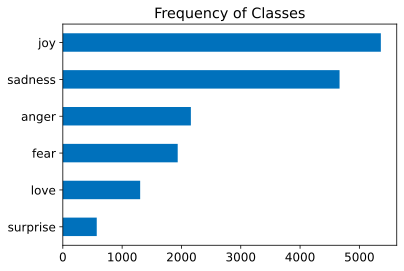

In [28]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

この場合、データセットが著しく不均衡であることがわかります。 「喜び」と「悲しみ」のクラスは頻繁に現れますが、「愛」と「驚き」は約 5 ～ 10 倍まれです。不均衡なデータに対処するには、次のようないくつかの方法があります。

* 少数派クラスをランダムにオーバーサンプリングします。
* 多数派クラスをランダムにアンダーサンプリングします。
* 過小評価されているクラスからラベル付きデータをさらに収集します。

この章では物事を簡単にするために、生のアンバランスなクラス周波数を扱います。これらのサンプリング手法について詳しく知りたい場合は、[Imbalance-learn ライブラリ](https://imbalance-learn.org/stable/) をチェックすることをお勧めします。トレーニング/テスト分割を作成する_前_にサンプリング メソッドを適用しないように注意してください。適用しないと、分割間で大量のリークが発生します。

クラスを見てきたので、ツイートそのものを見てみましょう。

### ツイートの長さはどのくらいか

Transformer モデルには、_最大コンテキスト サイズ_ と呼ばれる最大入力シーケンス長があります。 DistilBERT を使用するアプリケーションの場合、コンテキストの最大サイズは 512 トークンで、これはテキストの数段落に相当します。次のセクションで説明するように、トークンはアトミックなテキストの一部です。ここでは、トークンを 1 つの単語として扱います。ツイートごとの単語の分布を調べることで、感情ごとのツイートの長さを大まかに見積もることができます。

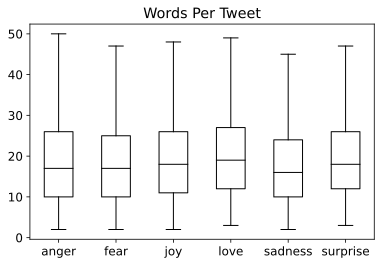

In [29]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

プロットから、各感情について、ほとんどのツイートの長さは約 15 ワードであり、最も長いツイートは DistilBERT の最大コンテキスト サイズを大幅に下回っていることがわかります。モデルのコンテキスト サイズより長いテキストは切り詰める必要があります。切り詰められたテキストに重要な情報が含まれている場合、パフォーマンスの低下につながる可能性があります。この場合、それは問題にならないようです。


これらの生のテキストを image:images/logo.png[hf,13,13] トランスフォーマーに適した形式に変換する方法を考えてみましょう。 `DataFrame` 形式はもう必要ないので、その一方で、データセットの出力形式もリセットしましょう。

In [30]:
emotions.reset_format()

## テキストからトークンへの変換

DistilBERT のようなトランスフォーマー モデルは、生の文字列を入力として受け取ることができません。代わりに、テキストが数値ベクトルとして_トークン化_および_エンコード_されていると想定します。トークン化は、文字列をモデルで使用される原子単位に分解するステップです。採用できるトークン化戦略はいくつかあり、単語をサブユニットに最適に分割する方法は通常、コーパスから学習されます。 DistilBERT に使用されるトークナイザーを検討する前に、_character_ と _word_ のトークン化という 2 つの極端なケースを考えてみましょう。

### 文字のトークン化


最も単純なトークン化スキームは、各文字をモデルに個別にフィードすることです。 Python では、`str` オブジェクトは実際には内部では配列であるため、たった 1 行のコードで文字レベルのトークン化をすばやく実装できます。

In [31]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ',
'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o',
'f', ' ', 'N', 'L', 'P', '.']


これは良いスタートではありますが、まだ終わっていません。私たちのモデルは、各文字が整数に変換されることを期待しています。このプロセスは、_数値化_ と呼ばれることもあります。これを行う簡単な方法の 1 つは、各一意のトークン (この場合は文字) を一意の整数でエンコードすることです。

In [32]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9,
'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18,
'z': 19}


これにより、語彙内の各文字から一意の整数へのマッピングが得られます。 `token2idx` を使用して、トークン化されたテキストを整数のリストに変換できるようになりました。

In [33]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7,
14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


各トークンは一意の数値識別子にマップされています (そのため、`input_ids`という名前が付けられています)。最後のステップは、`input_ids`をワンホット ベクトルの 2D テンソルに変換することです。ワンホット ベクトルは、序数または名義のいずれかであるカテゴリデータをエンコードするために機械学習で頻繁に使用されます。たとえば、`transformer` TV シリーズのキャラクターの名前をエンコードしたいとします。これを行う 1 つの方法は、次のように、各名前を一意の ID にマップすることです。

In [34]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


このアプローチの問題は、名前の間に架空の順序が作成されることですが、ニューラル ネットワークは、この種の関係を学習するのが非常に得意です。したがって、代わりに、カテゴリごとに新しい列を作成し、カテゴリが true の場合は 1 を割り当て、そうでない場合は 0 を割り当てます。 Pandas では、これは次のように `get_dummies()` 関数で実装できます。

In [35]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


この `DataFrame` の行はワンホット ベクトルであり、他のすべての場所に 1 と 0 を持つ単一の「ホット」エントリがあります。ここで、`input_ids` を見ると、同様の問題があります。要素は順序スケールを作成します。これは、結果が別のランダム トークンを表す新しい ID になるため、2 つの ID を加算または減算することは無意味な操作であることを意味します。

一方、2 つのワンホット エンコーディングを追加した結果は簡単に解釈できます。`hot`である 2 つのエントリは、対応するトークンが同時に発生することを示します。次のように `input_ids` をテンソルに変換し、`one_hot()` 関数を適用することで、PyTorch でワンホット エンコーディングを作成できます。

In [36]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

語彙は 20 個の一意の文字で構成されているため、38 個の入力トークンのそれぞれに対して 20 次元のワンホット ベクトルが得られます。

> 警告: `one_hot()` 関数で常に `num_classes` を設定することが重要です。そうしないと、ワンホット ベクトルが語彙の長さよりも短くなる可能性があります (手動でゼロを埋め込む必要があるため)。 TensorFlow では、同等の関数は `tf.one_hot()` であり、ここで ` Depth` 引数は `num_classes` の役割を果たします。

最初のベクトルを調べることで、`input_ids[0]`で示される位置に 1 が出現することを確認できます。

In [37]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


この簡単な例から、文字レベルのトークン化ではテキスト内の構造が無視され、文字列全体が文字のストリームとして扱われることがわかります。これはスペルミスや珍しい単語に対処するのに役立ちますが、主な欠点は、単語などの言語構造をデータから「学習」する必要があることです。これには、大量のコンピューティング、メモリ、およびデータが必要です。このため、文字のトークン化は実際にはほとんど使用されません。代わりに、テキストの一部の構造がトークン化ステップ中に保存されます。 _Word トークン化_ はこれを達成するための簡単なアプローチなので、それがどのように機能するかを見てみましょう。

### Word Tokenization

テキストを文字に分割する代わりに、テキストを単語に分割し、各単語を整数にマッピングできます。最初から単語を使用すると、モデルは文字から単語を学習するステップをスキップできるため、トレーニング プロセスの複雑さが軽減されます。


単語トークナイザーの単純なクラスの 1 つは、空白を使用してテキストをトークナイズします。これを行うには、Python の `split()` 関数を生のテキストに直接適用します (ツイートの長さを測定する場合と同じように)。

In [38]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


ここからは、文字トークナイザーで行ったのと同じ手順を実行して、各単語を ID にマッピングできます。ただし、このトークン化スキームには潜在的な問題が 1 つあることがすでにわかっています。句読点が考慮されていないため、`NLP`は単一のトークンとして扱われます。単語に語形変化、活用、スペルミスが含まれる可能性があることを考えると、語彙のサイズは簡単に数百万に達する可能性があります。


> 注釈: 一部の単語トークナイザーには、句読点に関する追加のルールがあります。また、テキスト内の一部の情報が失われる代わりに、単語を語幹に正規化するステミングまたは見出し語化を適用することもできます (たとえば、「great」、「greater」、および「greatest」はすべて「great」になります)。

ニューラルネットワークには膨大な数のパラメータが必要となるため、語彙が多いと問題になります。これを説明するために、100 万個の一意の単語があり、ニューラル ネットワークの最初の層で 100 万次元の入力ベクトルを 1,000 次元のベクトルに圧縮したいとします。これはほとんどの NLP アーキテクチャの標準ステップであり、この最初の層の結果として得られる重み行列には、100 万 $\times$ 1,000 = 10 億の重みが含まれます。これはすでに最大の GPT-2 モデルに匹敵します。脚注:[GPT-2 は GPT の後継であり、リアルなテキストを生成するその印象的な能力で世間の注目を集めました。 GPT-2 については <<chapter_summarization>> で詳しく説明します。] 合計約 15 億のパラメーターがあります。

当然のことながら、モデルのトレーニングにはコストがかかり、大規模なモデルはメンテナンスがより困難になるため、モデル パラメーターの無駄遣いは避けたいと考えています。一般的なアプローチは、たとえばコーパス内で最も一般的な 100,000 個の単語を考慮して、語彙を制限し、まれな単語を破棄することです。語彙の一部ではない単語は「不明」として分類され、共有の`UNK`トークンにマッピングされます。これは、モデルには`UNK`に関連付けられた単語に関する情報がないため、単語のトークン化のプロセスで潜在的に重要な情報が失われることを意味します。

すべての入力情報と入力構造の一部を保持する、文字と単語のトークン化の間に妥協点があれば、素晴らしいと思いませんか? _サブワードトークン化_があります。

### Subword Tokenization

サブワードのトークン化の背後にある基本的な考え方は、文字と単語のトークン化の最良の側面を組み合わせることです。一方で、モデルが複雑な単語やスペルミスに対処できるように、まれな単語をより小さな単位に分割したいと考えています。一方、入力の長さを管理可能なサイズに保つことができるように、頻繁に使用される単語を一意のエンティティとして保持したいと考えています。サブワードトークン化 (および単語トークン化) の主な特徴は、統計ルールとアルゴリズムの組み合わせを使用して事前トレーニング コーパスから学習されることです。

NLP で一般的に使用されるサブワードのトークン化アルゴリズムがいくつかありますが、WordPiece から始めましょう。脚注: [M. Schuster および K.中島、「日本語および韓国語の音声検索」、_2012 IEEE International Conference on Acoustics, Speech and Signal Processing_ (2012): 5149–5152](https://doi.org/10.1109/ICASSP.2012.6289079.).  BERT および DistilBERT トークナイザーによって使用されます。

WordPiece がどのように機能するかを理解する最も簡単な方法は、実際に動作しているのを見ることです。 image:images/logo.png[hf,13,13] Transformers は、事前トレーニングされたモデルに関連付けられたトークナイザーをすばやくロードできる便利な `AutoTokenizer` クラスを提供します。その `from_pretrained()` メソッドを呼び出して ID を提供するだけです。ハブまたはローカル ファイル パス上のモデルの。まずは DistilBERT のトークナイザーをロードしましょう。

In [39]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

`AutoTokenizer` クラスは、["auto" クラス](https://huggingface.co/docs/transformers/model_doc/auto) のより大きなセットに属しており、その役割は、モデルの構成、事前トレーニングされた重み、または語彙を自動的に取得することです。チェックポイントの名前。これにより、モデル間をすばやく切り替えることができますが、特定のクラスを手動でロードすることもできます。たとえば、次のように DistilBERT トークナイザーをロードできます。

```python
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
```

> 注釈: 初めて `AutoTokenizer.f rom_pretrained`() メソッドを実行すると、事前トレーニングされたトークナイザーのどのパラメータが Hugging Face Hub からロードされたかを示す進行状況バーが表示されます。コードを 2 回目に実行すると、通常は _~/.cache/huggingface/_ にあるキャッシュからトークナイザーがロードされます。

このトークナイザーに単純な「テキストのトークナイズは NLP の中核タスクである」を入力して、どのように機能するかを調べてみましょう。テキストの例:

In [40]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953,
2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


文字のトークン化で見たのと同じように、単語が `input_ids` フィールドの一意の整数にマップされていることがわかります。次のセクションで `attention_mask` フィールドの役割について説明します。 `input_ids` を取得したので、トークナイザーの `convert_ids_to_tokens()` メソッドを使用して、それらをトークンに変換し直すことができます。

In [41]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl',
'##p', '.', '[SEP]']


ここで 3 つのことがわかります。まず、いくつかの特別な `[CLS]` および `[SEP]` トークンがシーケンスの先頭と末尾に追加されています。これらのトークンはモデルごとに異なりますが、主な役割はシーケンスの開始と終了を示すことです。 2 番目に、トークンはそれぞれ小文字になっています。これは、この特定のチェックポイントの特徴です。最後に、「トークン化」と「NLP」が 2 つのトークンに分割されていることがわかります。これらは一般的な単語ではないため、これは当然のことです。 `##izing` と `##p` の `##` プレフィックスは、その前の文字列が空白ではないことを意味します。このプレフィックスを持つトークンは、トークンを文字列に変換するときに前のトークンとマージされる必要があります。 `AutoTokenizer` クラスには、まさにそれを行うための `convert_tokens_to_string()` メソッドがあるので、それをトークンに適用しましょう。

In [42]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


`AutoTokenizer` クラスには、トークナイザーに関する情報を提供するいくつかの属性もあります。たとえば、語彙のサイズを検査できます。

In [43]:
tokenizer.vocab_size

30522


および対応するモデルの最大コンテキスト サイズ:

In [44]:
tokenizer.model_max_length

512


知っておくべきもう 1 つの興味深い属性は、モデルが前方パスで予期するフィールドの名前です。

In [45]:
tokenizer.model_input_names

['input_ids', 'attention_mask']


単一文字列のトークン化プロセスの基本を理解したところで、データセット全体をトークン化する方法を見てみましょう。

> 注意: 事前トレーニングされたモデルを使用する場合、モデルのトレーニングに使用したものと同じトークナイザーを必ず使用することが_本当に_重要です。モデルの観点から見ると、トークナイザーの切り替えは語彙をシャッフルするようなものです。あなたの周りの誰もが「家」と「猫」のようなランダムな単語を交換し始めたら、あなたも何が起こっているのか理解するのに苦労するでしょう。

### データセット全体のトークン化

コーパス全体をトークン化するには、`DatasetDict` オブジェクトの `map()` メソッドを使用します。このメソッドは、データセット内の各要素に処理関数を適用する便利な方法を提供するため、本書全体で何度も登場します。すぐにわかりますが、`map()`メソッドを使用して新しい行と列を作成することもできます。

始めるために、最初に必要なのは、例をトークン化するための処理関数です。

In [46]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

この関数は、トークナイザーをサンプルのバッチに適用します。 `padding=True` はバッチ内の最長のサイズに合わせてサンプルをゼロで埋め込み、`truncation=True` はモデルの最大コンテキスト サイズに合わせてサンプルを切り詰めます。 `tokenize()` の動作を確認するために、トレーニング セットから 2 つの例のバッチを渡してみましょう。

In [47]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000,
2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300,
102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1]]}


ここでパディングの結果がわかります。`input_ids` の最初の要素は 2 番目の要素より短いため、その要素にゼロが追加されて同じ長さにされています。これらのゼロには、語彙内に対応する `[PAD]` トークンがあり、特別なトークンのセットには、前に遭遇した `[CLS]` および `[SEP]` トークンも含まれています。

In [48]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


また、トークナイザーは、エンコードされたツイートを`input_ids`として返すだけでなく、`attention_mask`配列のリストを返すことにも注意してください。これは、追加のパディング トークンによってモデルが混乱することを望まないためです。アテンション マスクにより、モデルは入力のパディング部分を無視できます。 attention-mask は、入力 ID とアテンション マスクがどのようにパディングされるかを視覚的に説明します。

処理関数を定義したら、それを 1 行のコードでコーパス内のすべての分割に適用できます。

In [49]:
# hide_output
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

デフォルトでは、`map()` メソッドはコーパス内のすべての例に対して個別に動作するため、`batched=True` を設定するとツイートがバッチでエンコードされます。 「batch_size=None」を設定したため、`tokenize()`関数は単一のバッチとしてデータセット全体に適用されます。これにより、入力テンソルとアテンション マスクがグローバルに同じ形状を持つことが保証され、この操作によって新しい `input_ids` 列と `attention_mask` 列がデータセットに追加されたことがわかります。


In [50]:
print(emotions_encoded["train"].column_names)

['attention_mask', 'input_ids', 'label', 'text']


> 注釈: 後の章では、_data Collat​​ors_ を使用して各バッチでテンソルを動的にパディングする方法を説明します。グローバルなパディングは、コーパス全体から特徴行列を抽出する次のセクションで役立ちます。

## テキスト分類の学習

冒頭 で説明したように、DistilBERT のようなモデルは、一連のテキスト内のマスクされた単語を予測するように事前トレーニングされています。ただし、これらの言語モデルをテキスト分類に直接使用することはできません。それらを少し変更する必要があります。どのような変更が必要かを理解するために、DistilBERT のようなエンコーダベースのモデルのアーキテクチャを見てみましょう。

まず、テキストがトークン化され、_トークン エンコーディング_と呼ばれるワンホット ベクトルとして表されます。トークナイザーのボキャブラリのサイズによってトークン エンコーディングの次元が決まり、通常は 20k ～ 200k の一意のトークンで構成されます。次に、これらのトークン エンコーディングは、低次元空間に存在するベクトルである _token embeddings_ に変換されます。次に、トークンの埋め込みがエンコーダー ブロック層を通過して、各入力トークンの_hidden state_が生成されます。言語モデリングの事前トレーニング目的の場合、脚注: [DistilBERT の場合、マスクされたトークンを推測します。] 各隠れ状態は、マスクされた入力トークンを予測するレイヤーに供給されます。分類タスクでは、言語モデリング層を分類層に置き換えます。

> 注釈: 実際には、行列とワンホット ベクトルの乗算は行列から列を選択することと同じであるため、PyTorch はトークン エンコーディング用のワンホット ベクトルを作成するステップをスキップします。これは、マトリックスからトークン ID を持つ列を取得することで直接実行できます。

Twitter データセットでこのようなモデルをトレーニングするには 2 つのオプションがあります。

- _特徴抽出_:: 隠れ状態を特徴として使用し、事前トレーニングされたモデルを変更せずに、それらの分類器をトレーニングするだけです。
- _Fine-tuning_:: モデル全体をエンドツーエンドでトレーニングします。これにより、事前トレーニングされたモデルのパラメーターも更新されます。

次のセクションでは、DistilBERT の両方のオプションを検討し、そのトレードオフを検討します。

### 特徴抽出器としてのトランスフォーマー


トランスフォーマーを特徴抽出器として使用するのは非常に簡単です。

トレーニング中に体の重みをフリーズし、隠れ状態を分類器の特徴として使用します。このアプローチの利点は、小さいモデルまたは浅いモデルを迅速にトレーニングできることです。このようなモデルは、ニューラル分類層、またはランダム フォレストなどの勾配に依存しない手法である可能性があります。この方法は、隠れ状態の事前計算が 1 回だけで済むため、GPU が利用できない場合に特に便利です。

#### 事前トレーニング済みモデルの使用


image:images/logo.png[hf,13,13] Transformers の別の便利な auto クラス `AutoModel`を使用します。 `AutoTokenizer` クラスと同様に、`AutoModel` には、事前トレーニングされたモデルの重みをロードするための `from_pretrained()` メソッドがあります。このメソッドを使用して、DistilBERT チェックポイントをロードしてみましょう。

In [51]:
# hide_output
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

ここでは、PyTorch を使用して GPU が利用可能かどうかを確認し、PyTorch の `nn.Module.to()` メソッドをモデル ローダーにチェーンしました。これにより、GPU がある場合にはモデルが GPU 上で実行されるようになります。そうでない場合、モデルは CPU 上で実行され、かなり遅くなる可能性があります。

`AutoModel` クラスは、トークン エンコーディングを埋め込みに変換し、それをエンコーダー スタックを通じてフィードして、非表示の状態を返します。コーパスからこれらの状態を抽出する方法を見てみましょう。

### 補足: フレームワーク間の相互運用性

PyTorch で書かれていますが、image:images/logo.png[hf,13,13] Transformers は TensorFlow および JAX との緊密な相互運用性を提供します。つまり、数行のコードを変更するだけで、お気に入りの深層学習フレームワークに事前トレーニング済みモデルを読み込むことができます。たとえば、次のように `TFAutoModel` クラスを使用して、TensorFlow に DistilBERT をロードできます。

In [52]:
#hide_output
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

この相互運用性は、モデルが 1 つのフレームワークでのみリリースされているが、それを別のフレームワークで使用したい場合に特に役立ちます。

```python
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")
```

エラーが発生します。このような場合、`TfAutoModel.from_pretrained()` 関数に `from_pt=True` 引数を指定すると、ライブラリが PyTorch の重みを自動的にダウンロードして変換します。

In [53]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

トランスフォーマーでフレームワークを切り替えるのは非常に簡単です。ほとんどの場合、クラスに「TF」プレフィックスを追加するだけで、同等の TensorFlow 2.0 クラスが得られます。 PyTorch の略称である `"pt"` 文字列 (たとえば、次のセクション) を使用する場合は、それを TensorFlow の略称である "`tf"` に置き換えるだけです。

#### 最後の隠れ状態の抽出

単一文字列の最後の非表示状態を取得してみましょう。最初に行う必要があるのは、文字列をエンコードし、トークンを PyTorch テンソルに変換することです。これは、次のようにトークナイザーに `return_tensors="pt"` 引数を指定することで実行できます。

In [54]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


見てわかるように、結果として得られるテンソルは `[batch_size, n_tokens]` という形状になります。エンコーディングをテンソルとして取得したので、最後のステップは、エンコーディングをモデルと同じデバイスに配置し、次のように入力を渡すことです。

In [55]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ...,
-0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]),
hidden_states=None, attentions=None)


ここでは、`torch.no_grad()` コンテキスト マネージャーを使用して、勾配の自動計算を無効にしています。これは、計算のメモリ使用量を削減できるため、推論に役立ちます。モデルの構成に応じて、出力には、Python の「namedtuple」に似たクラスに配置された、隠れ状態、損失、アテンションなどの複数のオブジェクトが含まれる場合があります。この例では、モデル出力は `BaseModelOutput` のインスタンスであり、名前によってその属性に簡単にアクセスできます。現在のモデルは、最後の非表示状態である属性を 1 つだけ返します。そのため、その形状を調べてみましょう。

In [56]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

隠れ状態テンソルを見ると、それが `[batch_size, n_tokens, hidden_​​dim]` という形状をしていることがわかります。つまり、6 つの入力トークンごとに 768 次元のベクトルが返されます。分類タスクの場合、`[CLS]` トークンに関連付けられた非表示状態を入力特徴として使用するのが一般的です。このトークンは各シーケンスの先頭に現れるため、次のように `outputs.last_hidden_​​state` にインデックスを付けるだけでトークンを抽出できます。

In [57]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

単一文字列の最後の非表示状態を取得する方法がわかったので、これらすべてのベクトルを格納する新しい `hidden_​​state` 列を作成して、データセット全体に対して同じことを実行してみましょう。トークナイザーで行ったように、`DatasetDict` の `map()` メソッドを使用して、すべての隠し状態を一度に抽出します。最初に行う必要があるのは、前のステップを処理関数でラップすることです。

In [58]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

この関数と前のロジックの唯一の違いは、最終的な隠し状態を NumPy 配列として CPU に戻す最後のステップです。バッチ入力を使用している場合、`map()` メソッドでは、処理関数が Python または NumPy オブジェクトを返す必要があります。

私たちのモデルは入力としてテンソルを想定しているため、次に行うことは、次のように `input_ids` 列と `attention_mask` 列を `"torch"` 形式に変換することです。

In [59]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])


次に、すべてのスプリットの非表示状態を一度に抽出します。

In [60]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

この場合、`batch_size=None`を設定していないため、代わりにデフォルトの`batch_size=1000`が使用されることに注意してください。予想どおり、+extract_&#x200b;hid&#x2060;den_&#x200b;states()+ 関数を適用すると、新しい `hidden_​​state` 列がデータセットに追加されました。

In [61]:
emotions_hidden["train"].column_names

['attention_mask', 'hidden_state', 'input_ids', 'label', 'text']

各ツイートに関連付けられた非表示状態が得られたので、次のステップはそれらに対して分類器をトレーニングすることです。これを行うには、特徴マトリックスが必要です。見てみましょう。

#### 特徴ベクトルの作成

前処理されたデータセットには、分類器をトレーニングするために必要なすべての情報が含まれています。隠れ状態を入力フィーチャとして使用し、ラベルをターゲットとして使用します。次のように、よく知られている Scikit-Learn 形式で対応する配列を簡単に作成できます。

In [62]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

隠れ状態でモデルをトレーニングする前に、健全性チェックを実行して、分類したい感情の有用な表現が提供されていることを確認することをお勧めします。次のセクションでは、特徴を視覚化することでこれを迅速に実現する方法を見ていきます。

#### トレーニングセットの可視化

768 次元で隠れた状態を視覚化するのは控えめに言っても難しいため、強力な UMAP 脚注を使用します。 McInnes、J. Healy、および J. Melville、L. ["UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction"](https://arxiv.org/abs/1802.03426), (2018).]

UMAP は、特徴量が [0,1] の範囲内に収まるようにスケーリングされる場合に最適に機能するため、最初に `MinMaxScaler` を適用し、次に `umap-learn` ライブラリの UMAP 実装を使用して隠れた状態を減らします。

In [63]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.419308,7.000417,0
1,-2.921429,6.290215,0
2,5.440484,3.345866,3
3,-2.194601,4.106155,2
4,-3.138628,4.279454,3


結果は、同じ数のトレーニング サンプルを含む配列ですが、最初の 768 個の特徴ではなく 2 個の特徴だけが含まれています。圧縮データをもう少し詳しく調べて、各カテゴリのポイントの密度を個別にプロットしてみましょう。

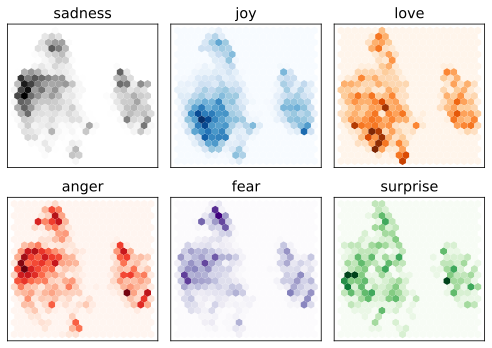

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()


>注釈: これらは低次元空間への投影にすぎません。いくつかのカテゴリが重なっているからといって、それらが元の空間で分離できないことを意味するわけではありません。逆に、投影された空間で分離可能であれば、元の空間でも分離可能になります。

このプロットから、いくつかの明確なパターンがわかります。「悲しみ」、「怒り」、「恐怖」などの否定的な感情はすべて、わずかに異なる分布を持ちながら同様の領域を占めています。一方、「喜び」と「愛」はネガティブな感情からしっかりと分離されており、同様の空間を共有している。最後に「驚き」が随所に散りばめられている。ある程度の分離を望んでいたかもしれませんが、モデルはこれらの感情の違いを知るように訓練されていないため、これは決して保証されません。テキスト内のマスクされた単語を推測することによって暗黙的に学習しただけです。

データセットの特徴についてある程度の考察が得られたので、いよいよデータセット上でモデルをトレーニングしてみましょう。

#### 単純な分類器の学習


隠れた状態は感情間で若干異なることがわかりましたが、感情のいくつかには明確な境界がありません。これらの隠れ状態を使用して、Scikit-Learn でロジスティック回帰モデルをトレーニングしてみましょう。このような単純なモデルのトレーニングは高速であり、GPU を必要としません。

In [65]:
#hide_output
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [66]:
lr_clf.score(X_valid, y_valid)

0.634

精度を見ると、私たちのモデルはランダムよりもわずかに優れているように見えるかもしれませんが、不均衡なマルチクラス データセットを扱っているため、実際にはかなり優れています。単純なベースラインと比較することで、モデルが適切かどうかを調べることができます。 Scikit-Learn には、常に多数派のクラスを選択する、または常にランダムなクラスを描画するなどの単純なヒューリスティックを使用して分類器を構築するために使用できる `DummyClassifier` があります。この場合、最もパフォーマンスの高いヒューリスティックは、最も頻繁に使用されるクラスを常に選択することです。これにより、約 35% の精度が得られます。

In [67]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

したがって、DistilBERT 埋め込みを使用した単純な分類器は、ベースラインよりも大幅に優れています。分類器の混同行列を調べることで、モデルのパフォーマンスをさらに調査できます。これにより、真のラベルと予測されたラベルの関係がわかります。

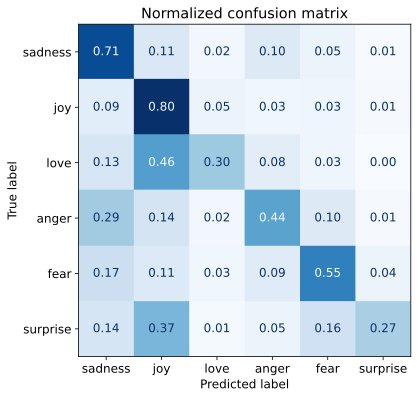

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

「怒り」と「恐怖」は、ほとんどの場合「悲しみ」と混同されることがわかります。これは、埋め込みを視覚化したときに行った観察と一致します。また、「愛」と「驚き」は「喜び」とよく間違えられます。

次回は、優れた分類パフォーマンスを実現する微調整アプローチについて説明します。ただし、これを行うには、GPU などのより多くの計算リソースが必要になり、個人では利用できない可能性があることに注意することが重要です。このような場合、特徴ベースのアプローチは、従来の機械学習と深層学習の間の適度な妥協が必要となる可能性があります。